In [1]:
import pandas as pd
import numpy as np
import pickle
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
from wordcloud import WordCloud
from sklearn.linear_model import Ridge
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
domains = ['trait', 'risk', 'people', 'food', 'occupation', 'brand', 'good']
dims = [('masculine', 'feminine'),
       ('dread-inducing', 'unknowable'),
       ('warm', 'competent'),
       ('tasty', 'nutritious'),
       ('significance', 'autonomy'),
       ('sincere', 'exciting'),
       ('hedonic', 'utilitarian')]

In [3]:
with open("data/dict_of_Xs.pickle", "rb") as handle:
    dict_of_Xs = pickle.load(handle)
    
with open("data/dict_of_ys.pickle", "rb") as handle:
    dict_of_ys = pickle.load(handle)

# Coca

In [4]:
common_words = pd.read_csv('ratings_wordfreq.csv', usecols=[0]).iloc[:,0].values
common_words[:5]

array(['a', 'abandon', 'ability', 'able', 'abortion'], dtype=object)

In [5]:
common_word_vectors_df = pd.read_csv('data/frequent_coca_word_vectors.csv', index_col='Unnamed: 0')
common_word_vectors_df.index.name = 'coha_word'
common_word_vectors_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
coha_word,,,,,,,,,,,,,,,,,,,,,
abandon,0.007660,0.078613,0.109375,0.339844,-0.208984,0.044678,-0.036621,-0.041992,0.192383,0.139648,...,-0.033203,0.355469,-0.205078,0.080566,-0.137695,-0.089355,0.199219,0.141602,0.107910,0.259766
ability,0.238281,0.125000,-0.056641,0.050049,-0.056885,-0.025146,0.091797,-0.032959,0.092773,-0.010010,...,-0.144531,0.173828,-0.172852,-0.251953,-0.136719,0.242188,0.160156,0.063965,-0.279297,0.026855
able,0.187500,0.068359,-0.011230,0.178711,-0.207031,-0.106445,0.195312,0.032227,0.193359,-0.125977,...,-0.116211,0.102051,-0.088867,-0.117188,-0.111816,0.117676,0.101562,0.005524,-0.021851,-0.179688
abortion,0.031738,0.097168,0.273438,0.363281,-0.306641,-0.202148,0.127930,0.123047,0.106934,-0.145508,...,0.386719,-0.464844,0.014160,0.030029,-0.035645,0.457031,0.531250,0.154297,0.065430,0.199219
about,0.202148,-0.081055,0.183594,-0.136719,-0.048584,0.105957,0.063477,-0.109863,0.146484,0.211914,...,-0.156250,0.115234,-0.126953,0.059814,-0.106934,-0.083008,-0.035156,0.066406,0.053711,-0.171875


# Dictionary-based vectors

In [6]:
common_word_vectors_df = pd.read_csv('data/all_dictionaries_avg_vectors.csv', index_col=0)
common_word_vectors_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
ABS,0.052968,0.058174,0.017703,0.112722,-0.049310,-0.014626,0.100538,-0.129927,0.112310,0.091880,...,-0.103572,0.016755,-0.105299,-0.073194,-0.040848,-0.023607,-0.004454,-0.031019,-0.006420,0.007980
ANI,0.016805,0.059525,-0.109212,0.051913,-0.011672,-0.016482,0.007370,0.010336,0.032750,0.023493,...,-0.080478,0.032333,-0.052147,0.019466,0.037320,0.042899,0.024788,0.075553,-0.016282,0.054179
Abs@,0.087599,0.031946,0.023137,0.113881,-0.061689,0.025222,0.108956,-0.117095,0.095482,0.062639,...,-0.129198,0.016960,-0.068941,-0.086341,-0.055007,0.017959,0.060075,-0.037992,-0.015173,0.027398
Academ,0.044438,0.003830,0.057370,0.116633,0.054826,0.051322,0.106225,-0.075915,0.023893,-0.062673,...,-0.099712,-0.000262,-0.124277,0.010901,-0.011603,-0.002407,0.001179,-0.026688,0.066651,0.040569
Active,0.039693,0.064372,0.004317,0.051630,-0.075722,0.015239,0.064575,-0.044810,0.083074,0.072660,...,-0.012119,0.081356,-0.081680,0.026389,-0.076665,-0.045332,-0.007333,-0.076769,0.025917,-0.001233


In [7]:
common_word_vectors_df.shape

(256, 300)

# Wordclouds of words who project strongly onto judgment dimension via ridge regression

trait
	 masculine


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


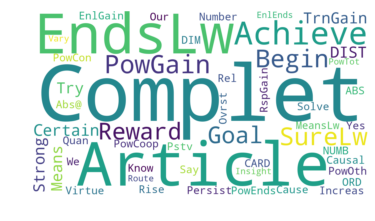

	 feminine


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


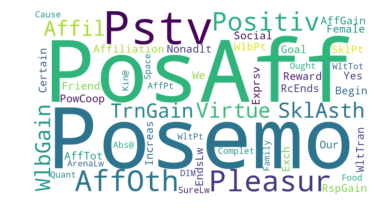

risk
	 dread-inducing


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


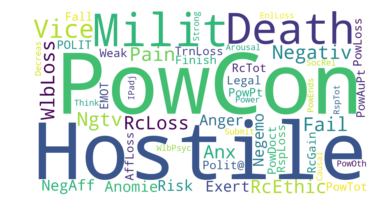

	 unknowable


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


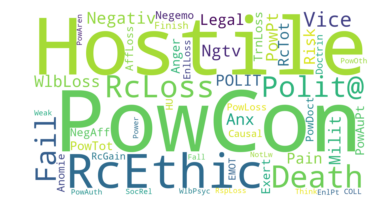

people
	 warm


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


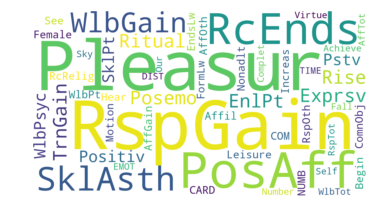

	 competent


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


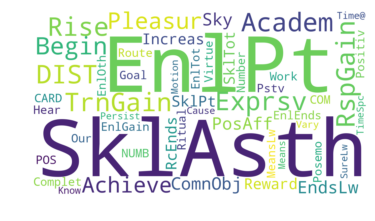

food
	 tasty


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


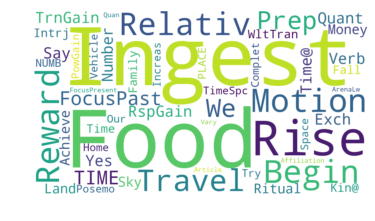

	 nutritious


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


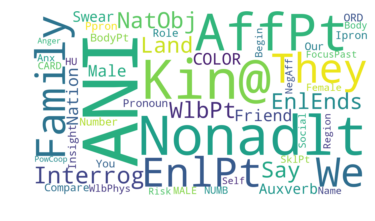

occupation
	 significance


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


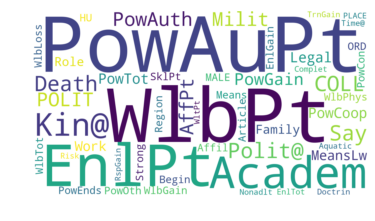

	 autonomy


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


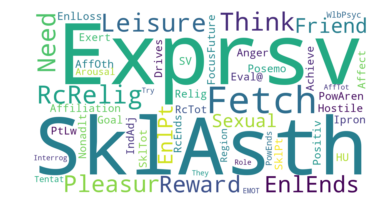

brand
	 sincere


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


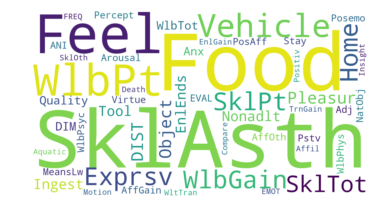

	 exciting


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


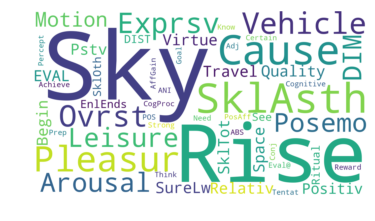

good
	 hedonic


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


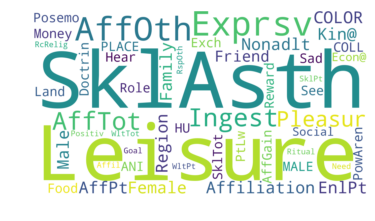

	 utilitarian


/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


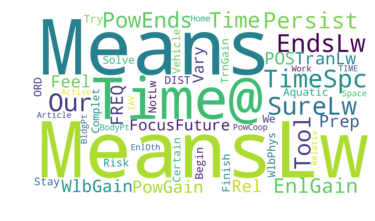

In [8]:
ridge = Ridge(alpha=10)

for domain, dim_pair in zip(domains, dims):
    print(domain)
    for dim in dim_pair:
        print('\t', dim)
        judgment_target_vectors = dict_of_Xs[domain]
#         judgment_target_vectors = normalize(judgment_target_vectors)
        judgment_target_vectors = pd.DataFrame(judgment_target_vectors, index=judgment_target_vectors.index)
        judgment_target_words = judgment_target_vectors.index
        judgments = dict_of_ys[dim]
        ridge.fit(X=judgment_target_vectors, y=judgments)
        
        masking_array = ~common_word_vectors_df.index.isin(judgment_target_words) # to remove words that are also judgment words
        usable_common_word_vectors_df = common_word_vectors_df[masking_array]        
        coca_predictions = ridge.predict(X=usable_common_word_vectors_df.values)
        coca_predictions_ser = pd.Series(coca_predictions, index=usable_common_word_vectors_df.index)
#         coca_predictions_ser.to_csv(f'results/predicted_judgment_associates/{dim}.csv')
        coca_predictions_ser.sort_values(ascending=False).to_csv(f'results/predicted_judgment_associates/{dim}_dictionary_words.csv')


        # if doing dictionary words, need to add 100 b/c wordcloud function doesn't like having negative values, 
        # since it thinks it's getting word frequencies
        coca_predictions_ser = coca_predictions_ser + 100
        
        associations_dict = coca_predictions_ser.to_dict()
        wordcloud = WordCloud(width=1350, height=750, max_words=50, background_color='white', 
                              relative_scaling=1, normalize_plurals=False).generate_from_frequencies(associations_dict)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
#         plt.savefig(fname=f'figures/wordclouds/predicted_judgment_associate_wordclouds/{dim}.png')
        plt.savefig(fname=f'figures/wordclouds/predicted_judgment_associate_wordclouds/{dim}_dictionary_words.png')
        plt.show()

# Wordlouds of words whose predicted judgment is strong *relative* to the complementary judgment dimension

In [9]:
domains = ['trait', 'risk', 'people', 'food', 'occupation', 'brand', 'good']
dims = [('masculine', 'feminine'),
       ('dread-inducing', 'unknowable'),
       ('warm', 'competent'),
       ('tasty', 'nutritious'),
       ('significance', 'autonomy'),
       ('sincere', 'exciting'),
       ('hedonic', 'utilitarian')]

In [10]:
def make_word_cloud(series, dim, ax):
    associations_dict = series.to_dict()
    wordcloud = WordCloud(width=1350, height=750, max_words=50, background_color='white', 
                          relative_scaling=1, normalize_plurals=False).generate_from_frequencies(associations_dict)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(dim.capitalize(), fontdict={'fontsize':30})

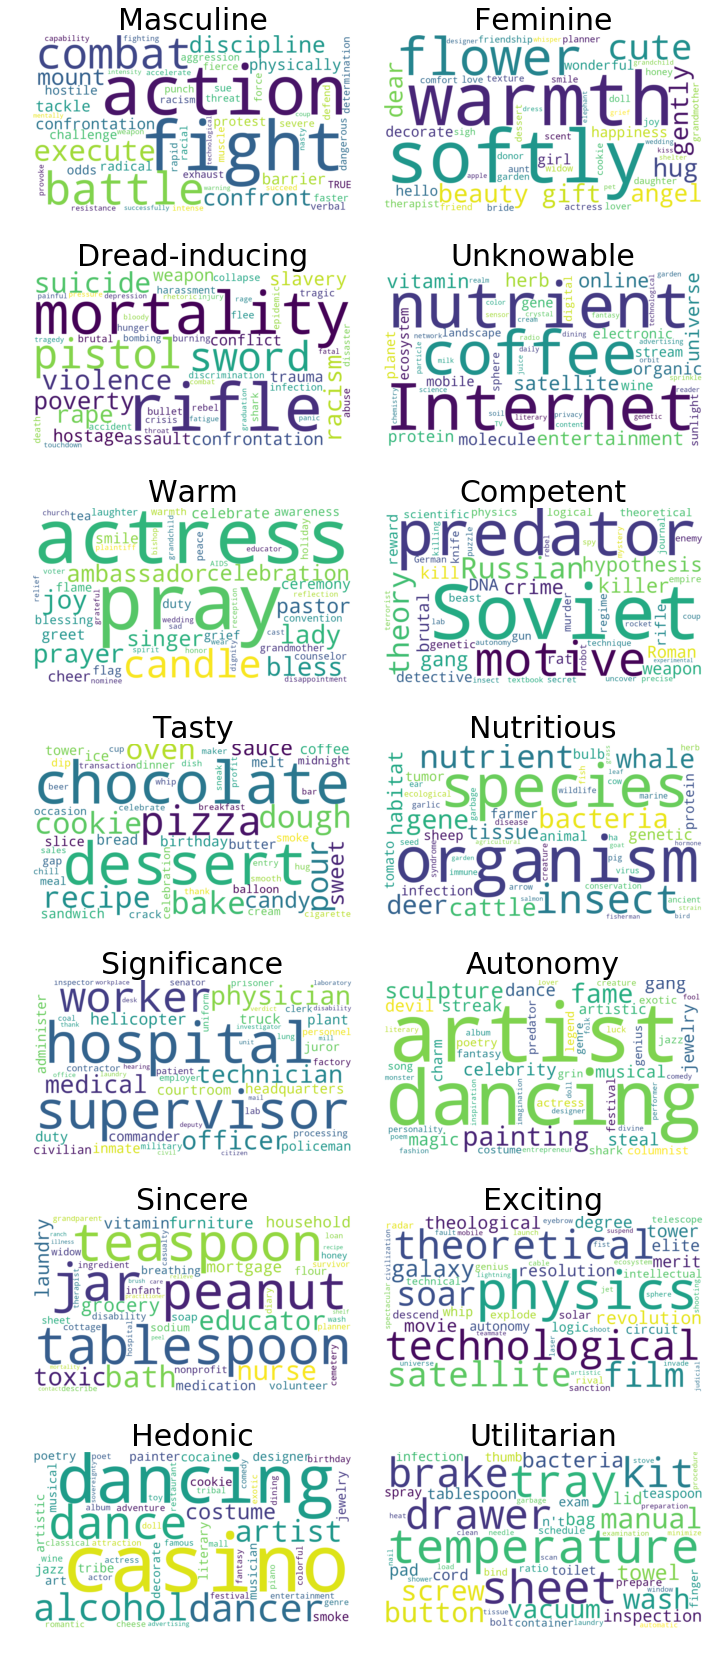

In [16]:
fig, ax_array = plt.subplots(nrows=7, ncols=2, figsize=(12,30))

for domain_idx, dim_pair in enumerate(dims):
    dim0 = dim_pair[0]
    dim1 = dim_pair[1]
    associations0 = pd.read_csv(f'results/predicted_judgment_associates/{dim0}.csv', header=None, index_col=0)[1]
    associations1 = pd.read_csv(f'results/predicted_judgment_associates/{dim1}.csv', header=None, index_col=0)[1]
    diff = associations0 - associations1
    
    ax = ax_array[domain_idx,0]
    # add 100 b/c wordcloud function doesn't like having negative values, since it thinks it's getting word frequencies
    high_dim0_assoc = diff + 100
    make_word_cloud(high_dim0_assoc, dim0, ax)
    
    ax = ax_array[domain_idx,1]
    low_dim0_assoc = -diff + 100
    make_word_cloud(low_dim0_assoc, dim1, ax)

plt.subplots_adjust(hspace=0.10)
plt.subplots_adjust(wspace=0.10)
plt.savefig('figures/wordclouds/predicted_relative_judgment_associate_wordclouds.png')
plt.savefig('figures/wordclouds/predicted_relative_judgment_associate_wordclouds_high_res.png', dpi=100)
plt.savefig('figures/wordclouds/predicted_relative_judgment_associate_wordclouds_high_res.pdf')